In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style("darkgrid")
sns.set_palette("pastel")

In [3]:
PATH = '/home/khan74/project/priv/new_DL_DES/'

In [4]:
high_certainty_path = PATH + 'data/sdss-galaxyzoo/high_certainty/merged_dataset.csv'
full_over_lap_path = PATH + 'data/sdss-galaxyzoo/des_overlap/merged_dataset.csv'

In [5]:
high_certainty_df = pd.read_csv( high_certainty_path )
full_overlap_df = pd.read_csv( full_over_lap_path )

# High confidence Overlap 

### 1. Intersection b/w 'high confidence' &  'full overlap'

In [6]:
intersection = pd.merge(high_certainty_df, full_overlap_df, how='inner')

In [7]:
len(intersection)

1150

In [8]:
intersection.columns

Index(['OBJID', 'RA', 'DEC', 'NVOTE', 'P_EL', 'P_CW', 'P_ACW', 'P_EDGE',
       'P_DK', 'P_MG', 'P_CS', 'P_EL_DEBIASED', 'P_CS_DEBIASED', 'SPIRAL',
       'ELLIPTICAL', 'UNCERTAIN', 'RA_deg', 'DEC_deg', 'ra', 'dec', 'u', 'g',
       'r', 'i', 'z', 'run', 'rerun', 'camcol', 'field', 'petroRad_r'],
      dtype='object')

In [9]:
spirals = intersection[ intersection.P_CS_DEBIASED > intersection.P_EL_DEBIASED ]
ellipticals = intersection[ intersection.P_CS_DEBIASED < intersection.P_EL_DEBIASED ]

In [10]:
spirals.shape, ellipticals.shape

((562, 30), (588, 30))

Text(0.5, 1.0, 'Prob dist for each type in the "intersection" dataset')

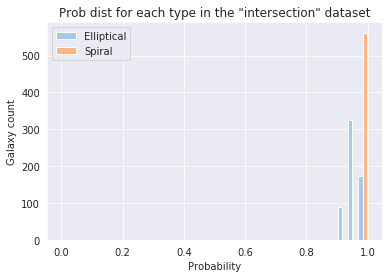

In [11]:
plt.hist([ellipticals.P_EL_DEBIASED, spirals.P_CS_DEBIASED], bins=30, range=(0, 1), label=['Elliptical', 'Spiral'])
plt.legend()
plt.xlabel('Probability')
plt.ylabel('Galaxy count')
plt.title('Prob dist for each type in the "intersection" dataset')

/home/khan74/.conda/envs/AI/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Violin plot for spirals in "intersection" dataset')

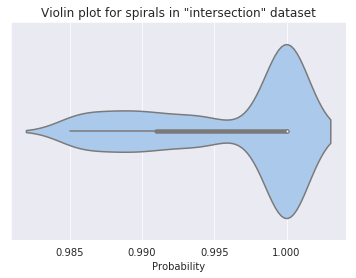

In [12]:
sns.violinplot(spirals.P_CS_DEBIASED)
plt.xlabel('Probability')
plt.title('Violin plot for spirals in "intersection" dataset')

Text(0.5, 1.0, 'Violin plot for elliptical in "intersection" dataset')

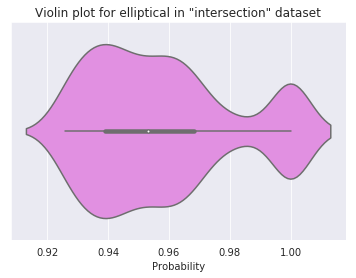

In [13]:
sns.violinplot(ellipticals.P_EL_DEBIASED, color='violet')
plt.xlabel('Probability')
plt.title('Violin plot for elliptical in "intersection" dataset')

Text(0.5, 1.0, 'RA distribution for "intersection" dataset')

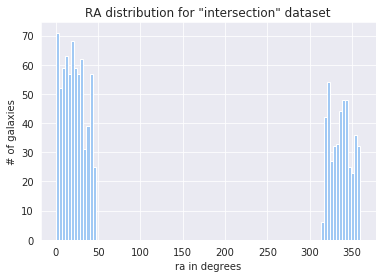

In [14]:
intersection.ra.hist(bins=100)
plt.xlabel('ra in degrees')
plt.ylabel('# of galaxies')
plt.title('RA distribution for "intersection" dataset')

Text(0.5, 1.0, 'DEC distribution for "intersection" dataset')

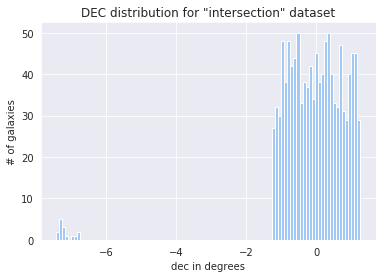

In [15]:
intersection.dec.hist(bins=100)
plt.xlabel('dec in degrees')
plt.ylabel('# of galaxies')
plt.title('DEC distribution for "intersection" dataset')

Text(0, 0.5, 'dec')

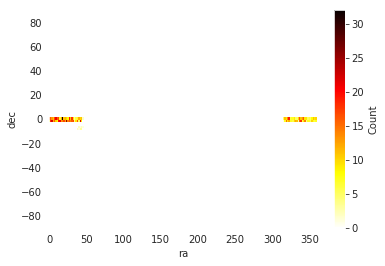

In [16]:
plt.hist2d(intersection['ra'], intersection['dec'], bins=[200, 100], range=[[0, 360], [-90, 90]], cmap='hot_r')
plt.colorbar(label='Count')
plt.xlabel('ra')
plt.ylabel('dec')

Text(0.5, 1.0, 'KDE plot for coverage of the "intersection"')

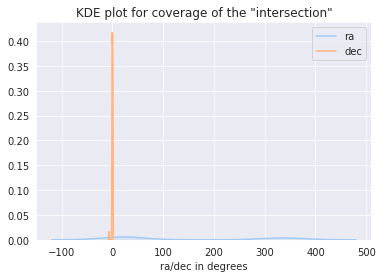

In [17]:
sns.kdeplot(intersection.ra, shade=True, label='ra')
sns.kdeplot(intersection.dec, shade=True, label='dec')
plt.xlabel('ra/dec in degrees')
plt.title('KDE plot for coverage of the "intersection"')

### 2. Astropy Crossmatch 

In [18]:
from os import path, makedirs, listdir
from os.path import isfile, join
import glob

In [19]:
crossmatch_dbs_path = PATH + 'src/des/des_sdss_overlap/high_prob_overlap/metadata/crossmatch/'
crossmatch_dbs = [f for f in listdir(crossmatch_dbs_path) if isfile(join(crossmatch_dbs_path, f))]

In [20]:
crossmatch_df = pd.read_csv(crossmatch_dbs_path+crossmatch_dbs[0])

In [21]:
for files in crossmatch_dbs[1:]:
    df = pd.read_csv(crossmatch_dbs_path+files)
    crossmatch_df = pd.concat([crossmatch_df, df])

In [22]:
crossmatch_df.reset_index(inplace=True)
crossmatch_df.drop(columns=['Unnamed: 0','index'], inplace=True)

In [23]:
len(crossmatch_df) 

1366

In [24]:
len(intersection)

1150

In [25]:
len(crossmatch_df.loc[ crossmatch_df['SDSS_OBJID'].isin(intersection.OBJID) ])

1141

In [26]:
len(crossmatch_df.loc[ ~crossmatch_df['SDSS_OBJID'].isin(intersection.OBJID) ])

225

In [27]:
len( intersection.loc[ ~intersection['OBJID'].isin(crossmatch_df.SDSS_OBJID) ])

9

In [41]:
Nine_galaxies = intersection.loc[ ~intersection['OBJID'].isin(crossmatch_df.SDSS_OBJID) ]

**Lets use crossmatch_df as part of the high_prob test set, and remove the 9 galaxies in intersection that are not in crossmatch_df from the full_overlap test set.**

In [140]:
crossmatch_df.to_csv('/home/khan74/project/priv/new_DL_DES/src/des/des_sdss_overlap/high_prob_overlap/high_prob_crossmatch_merged.csv')

In [141]:
spirals = crossmatch_df[ crossmatch_df.P_CS_DEBIASED > crossmatch_df.P_EL_DEBIASED ]
ellipticals = crossmatch_df[ crossmatch_df.P_CS_DEBIASED < crossmatch_df.P_EL_DEBIASED ]

In [142]:
spirals.shape, ellipticals.shape

((668, 244), (698, 244))

Text(0.5, 1.0, 'Prob dist for each type in the "crossmatch" dataset')

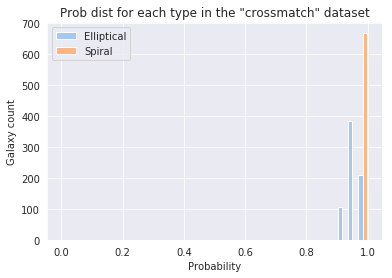

In [143]:
plt.hist([ellipticals.P_EL_DEBIASED, spirals.P_CS_DEBIASED], bins=30, range=(0, 1), label=['Elliptical', 'Spiral'])
plt.legend()
plt.xlabel('Probability')
plt.ylabel('Galaxy count')
plt.title('Prob dist for each type in the "crossmatch" dataset')

Text(0.5, 1.0, 'Violin plot for spirals in "crossmatch" dataset')

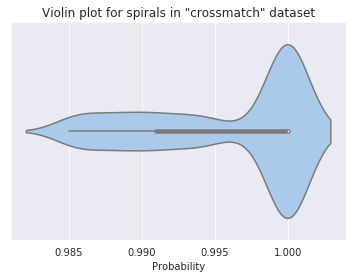

In [144]:
sns.violinplot(spirals.P_CS_DEBIASED)
plt.xlabel('Probability')
plt.title('Violin plot for spirals in "crossmatch" dataset')

Text(0.5, 1.0, 'Violin plot for ellipticals in "crossmatch" dataset')

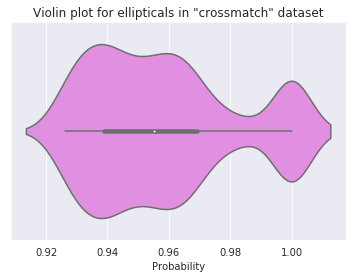

In [150]:
sns.violinplot(ellipticals.P_EL_DEBIASED, color='violet')
plt.xlabel('Probability')
plt.title('Violin plot for ellipticals in "crossmatch" dataset')

Text(0.5, 1.0, 'RA distribution for "crossmatch" dataset')

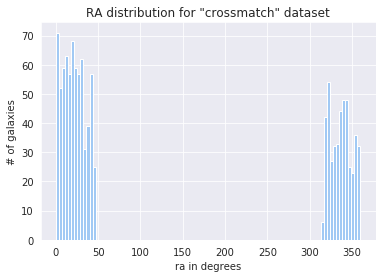

In [146]:
intersection.ra.hist(bins=100)
plt.xlabel('ra in degrees')
plt.ylabel('# of galaxies')
plt.title('RA distribution for "crossmatch" dataset')

Text(0.5, 1.0, 'DEC distribution for "crossmatch" dataset')

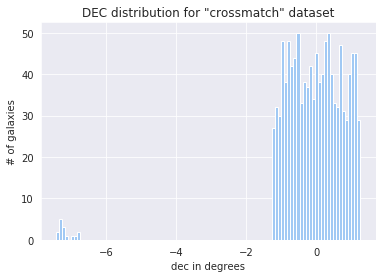

In [147]:
intersection.dec.hist(bins=100)
plt.xlabel('dec in degrees')
plt.ylabel('# of galaxies')
plt.title('DEC distribution for "crossmatch" dataset')

Text(0, 0.5, 'dec')

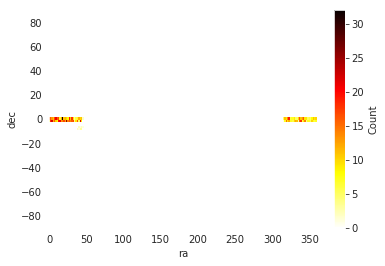

In [148]:
plt.hist2d(intersection['ra'], intersection['dec'], bins=[200, 100], range=[[0, 360], [-90, 90]], cmap='hot_r')
plt.colorbar(label='Count')
plt.xlabel('ra')
plt.ylabel('dec')

Text(0.5, 1.0, 'KDE plot for coverage of the "crossmacth"')

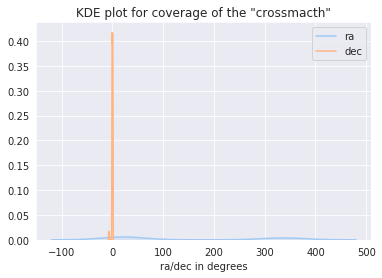

In [149]:
sns.kdeplot(intersection.ra, shade=True, label='ra')
sns.kdeplot(intersection.dec, shade=True, label='dec')
plt.xlabel('ra/dec in degrees')
plt.title('KDE plot for coverage of the "crossmacth"')

# Full Overlap 

### 1. Astropy Crossmatch

In [30]:
full_crossmatch_dbs_path = PATH + 'src/des/des_sdss_overlap/full_overlap/metadata/crossmatch/'
full_crossmatch_dbs = [f for f in listdir(full_crossmatch_dbs_path) if isfile(join(full_crossmatch_dbs_path, f))]

In [32]:
full_crossmatch_df = pd.read_csv(full_crossmatch_dbs_path+full_crossmatch_dbs[0])

In [33]:
for files in full_crossmatch_dbs[1:]:
    df = pd.read_csv(full_crossmatch_dbs_path+files)
    full_crossmatch_df = pd.concat([full_crossmatch_df, df])

In [34]:
full_crossmatch_df.reset_index(inplace=True)
full_crossmatch_df.drop(columns=['Unnamed: 0','index'], inplace=True)

In [38]:
len( full_crossmatch_df )

16759

In [39]:
len( full_overlap_df )

16922

Lets see if the 9 galaxies that were in the intersection but not in the high_prob_crossmatch are still here

In [43]:
full_crossmatch_df[ full_crossmatch_df['SDSS_OBJID'].isin( Nine_galaxies.OBJID ) ]

,SDSS_OBJID,RA_sdss,DEC_sdss,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,...,SPREADERR_MODEL_R,SPREADERR_MODEL_I,SPREADERR_MODEL_Z,SPREADERR_MODEL_Y,WAVG_SPREADERR_MODEL_G,WAVG_SPREADERR_MODEL_R,WAVG_SPREADERR_MODEL_I,WAVG_SPREADERR_MODEL_Z,WAVG_SPREADERR_MODEL_Y,d2d_des
1842,588015509806252115,23:59:53.74,+00:33:22.3,40,0.0,0.975,0.0,0.025,0.0,0.0,...,0.000039,0.000036,0.000035,0.000081,0.000093,0.000044,0.00005,0.000058,0.000199,0.061344


Lets check if this galaxy is in the training set. 

In [44]:
training_df = pd.read_csv('/home/khan74/project/priv/new_DL_DES/deeplearning/data/training_set.csv')

In [48]:
training_df[ training_df.OBJID==588015509806252115 ]

,Unnamed: 0,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,...,u,g,r,i,z,run,rerun,camcol,field,petroRad_r
11288,11288,588015509806252115,23:59:53.74,+00:33:22.3,40,0.0,0.975,0.0,0.025,0.0,...,18.246058,16.40052,15.492794,15.059828,14.740546,3325,41,5,108,8.022477


Lets remove it from full_crossmatch_df

In [49]:
full_crossmatch_df = full_crossmatch_df[ full_crossmatch_df.SDSS_OBJID != 588015509806252115 ]

In [50]:
len(full_crossmatch_df)

16758

**Save**

In [51]:
full_crossmatch_df.to_csv('/home/khan74/project/priv/new_DL_DES/src/des/des_sdss_overlap/full_overlap/full_overlap_crossmatch_merged.csv')